import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

df = pd.read_csv("worldometer_coronavirus_daily_data.csv")

In [ ]:
df

df.country.unique()

In [5]:
Afgha = df[df.country == "Afghanistan"]

In [6]:
Afgha

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
478,2021-6-07,Afghanistan,82326.0,1582.0,20077.0,3251.0,56.0
479,2021-6-08,Afghanistan,84050.0,1724.0,21176.0,3305.0,54.0
480,2021-6-09,Afghanistan,85892.0,1842.0,22665.0,3356.0,51.0
481,2021-6-10,Afghanistan,87716.0,1824.0,24024.0,3412.0,56.0


In [7]:
Afgha.isna().sum()

date                        0
country                     0
cumulative_total_cases      0
daily_new_cases            10
active_cases                0
cumulative_total_deaths     0
daily_new_deaths           10
dtype: int64

In [8]:
Afgha =Afgha.dropna(axis=1)

In [9]:
Afgha

,date,country,cumulative_total_cases,active_cases,cumulative_total_deaths
0,2020-2-15,Afghanistan,0.0,0.0,0.0
1,2020-2-16,Afghanistan,0.0,0.0,0.0
2,2020-2-17,Afghanistan,0.0,0.0,0.0
3,2020-2-18,Afghanistan,0.0,0.0,0.0
4,2020-2-19,Afghanistan,0.0,0.0,0.0
...,...,...,...,...,...
478,2021-6-07,Afghanistan,82326.0,20077.0,3251.0
479,2021-6-08,Afghanistan,84050.0,21176.0,3305.0
480,2021-6-09,Afghanistan,85892.0,22665.0,3356.0
481,2021-6-10,Afghanistan,87716.0,24024.0,3412.0


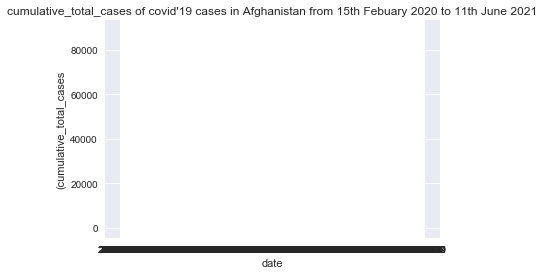

In [10]:
plt.plot(Afgha.date, Afgha.cumulative_total_cases,'r+')
plt.xlabel("date")
plt.ylabel("(cumulative_total_cases")
plt.title("cumulative_total_cases of covid'19 cases in Afghanistan from 15th Febuary 2020 to 11th June 2021")
plt.show()

In [11]:
date = Afgha.keys()

In [12]:
Afgha.date


0      2020-2-15
1      2020-2-16
2      2020-2-17
3      2020-2-18
4      2020-2-19
         ...    
478    2021-6-07
479    2021-6-08
480    2021-6-09
481    2021-6-10
482    2021-6-11
Name: date, Length: 483, dtype: object

In [13]:
# Finding the total confirmed cases, death cases and recovered cases and append them to an empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

date = Afgha.cumulative_total_cases.keys()
Afgha.cumulative_total_cases = []
Afgha.cumulative_total_deaths = []
Afgha.active_cases = []



for i in date:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

ValueError: Length of values does not match length of index

In [14]:
days_since_2_15 = np.array([i for i in range (len(date))]).reshape(-1, 1)

In [15]:
Afgha.cumulative_total_cases = np.array(Afgha.cumulative_total_cases).reshape(-1, 1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1]:
Afgha.cumulative_total_deaths = np.array(Afgha.cumulative_total_deaths).reshape(-1, 1)

NameError: name 'np' is not defined

In [17]:
Afgha.active_cases = np.array(Afgha.active_cases).reshape(-1, 1)